<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Ensemble methods
© ExploreAI Academy

In this train, we'll implement various ensemble methods using the Python scikit-learn library to enhance prediction models.

## Learning objectives

By the end of this train, you should be able to:
- Identify and apply different ensemble techniques within the scikit-learn framework.
- Execute an ensemble method to improve the performance of a predictive model on a given dataset.
- Evaluate and compare the effectiveness of ensemble methods versus single-model approaches.

## Exercise

### Exercise 1: Exploratory data analysis (EDA)

Before we dive into ensemble methods, it's crucial to start with a robust feature selection process. This will help ensure that our models are only trained on variables that have a significant impact on our predictive variable, `BiodiversityHealthIndex`.

Conduct a thorough EDA to understand the relationships between `BiodiversityHealthIndex` and other environmental indicators in the dataset. Look for patterns, anomalies, or any insights that can inform your feature selection process.

Steps:
1. Load and inspect the dataset (URL: `https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv`). 
2. Generate summary statistics for numerical features. 
3. Visualise the distribution of the `BiodiversityHealthIndex`.  
4. Use a pairplot to visualise the relationships between variables.

   Year  WaterQualityIndex  ClimateChangeImpactScore  LandUseChange  \
0  2010                 35                  7.542535       6.630073   
1  2010                 13                  1.617642       6.477132   
2  2010                 10                  0.904817       9.069428   
3  2010                 36                  7.060190       7.061932   
4  2010                 24                  8.439246       4.504786   

   InvasiveSpeciesCount  ConservationFunding  EcoTourismImpact  \
0                    39                   46          1.193810   
1                    45                   18          8.484718   
2                    28                   59          3.412444   
3                    37                   88          9.718453   
4                    41                   88          9.118186   

   ForestCoverChange  SoilQualityIndex  WaterUsage  RenewableEnergyUsage  \
0           0.032204                70          33                    13   
1          -4.803485    

<Figure size 800x600 with 0 Axes>

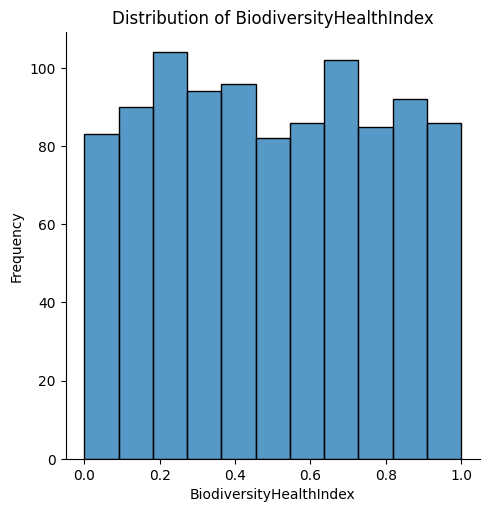

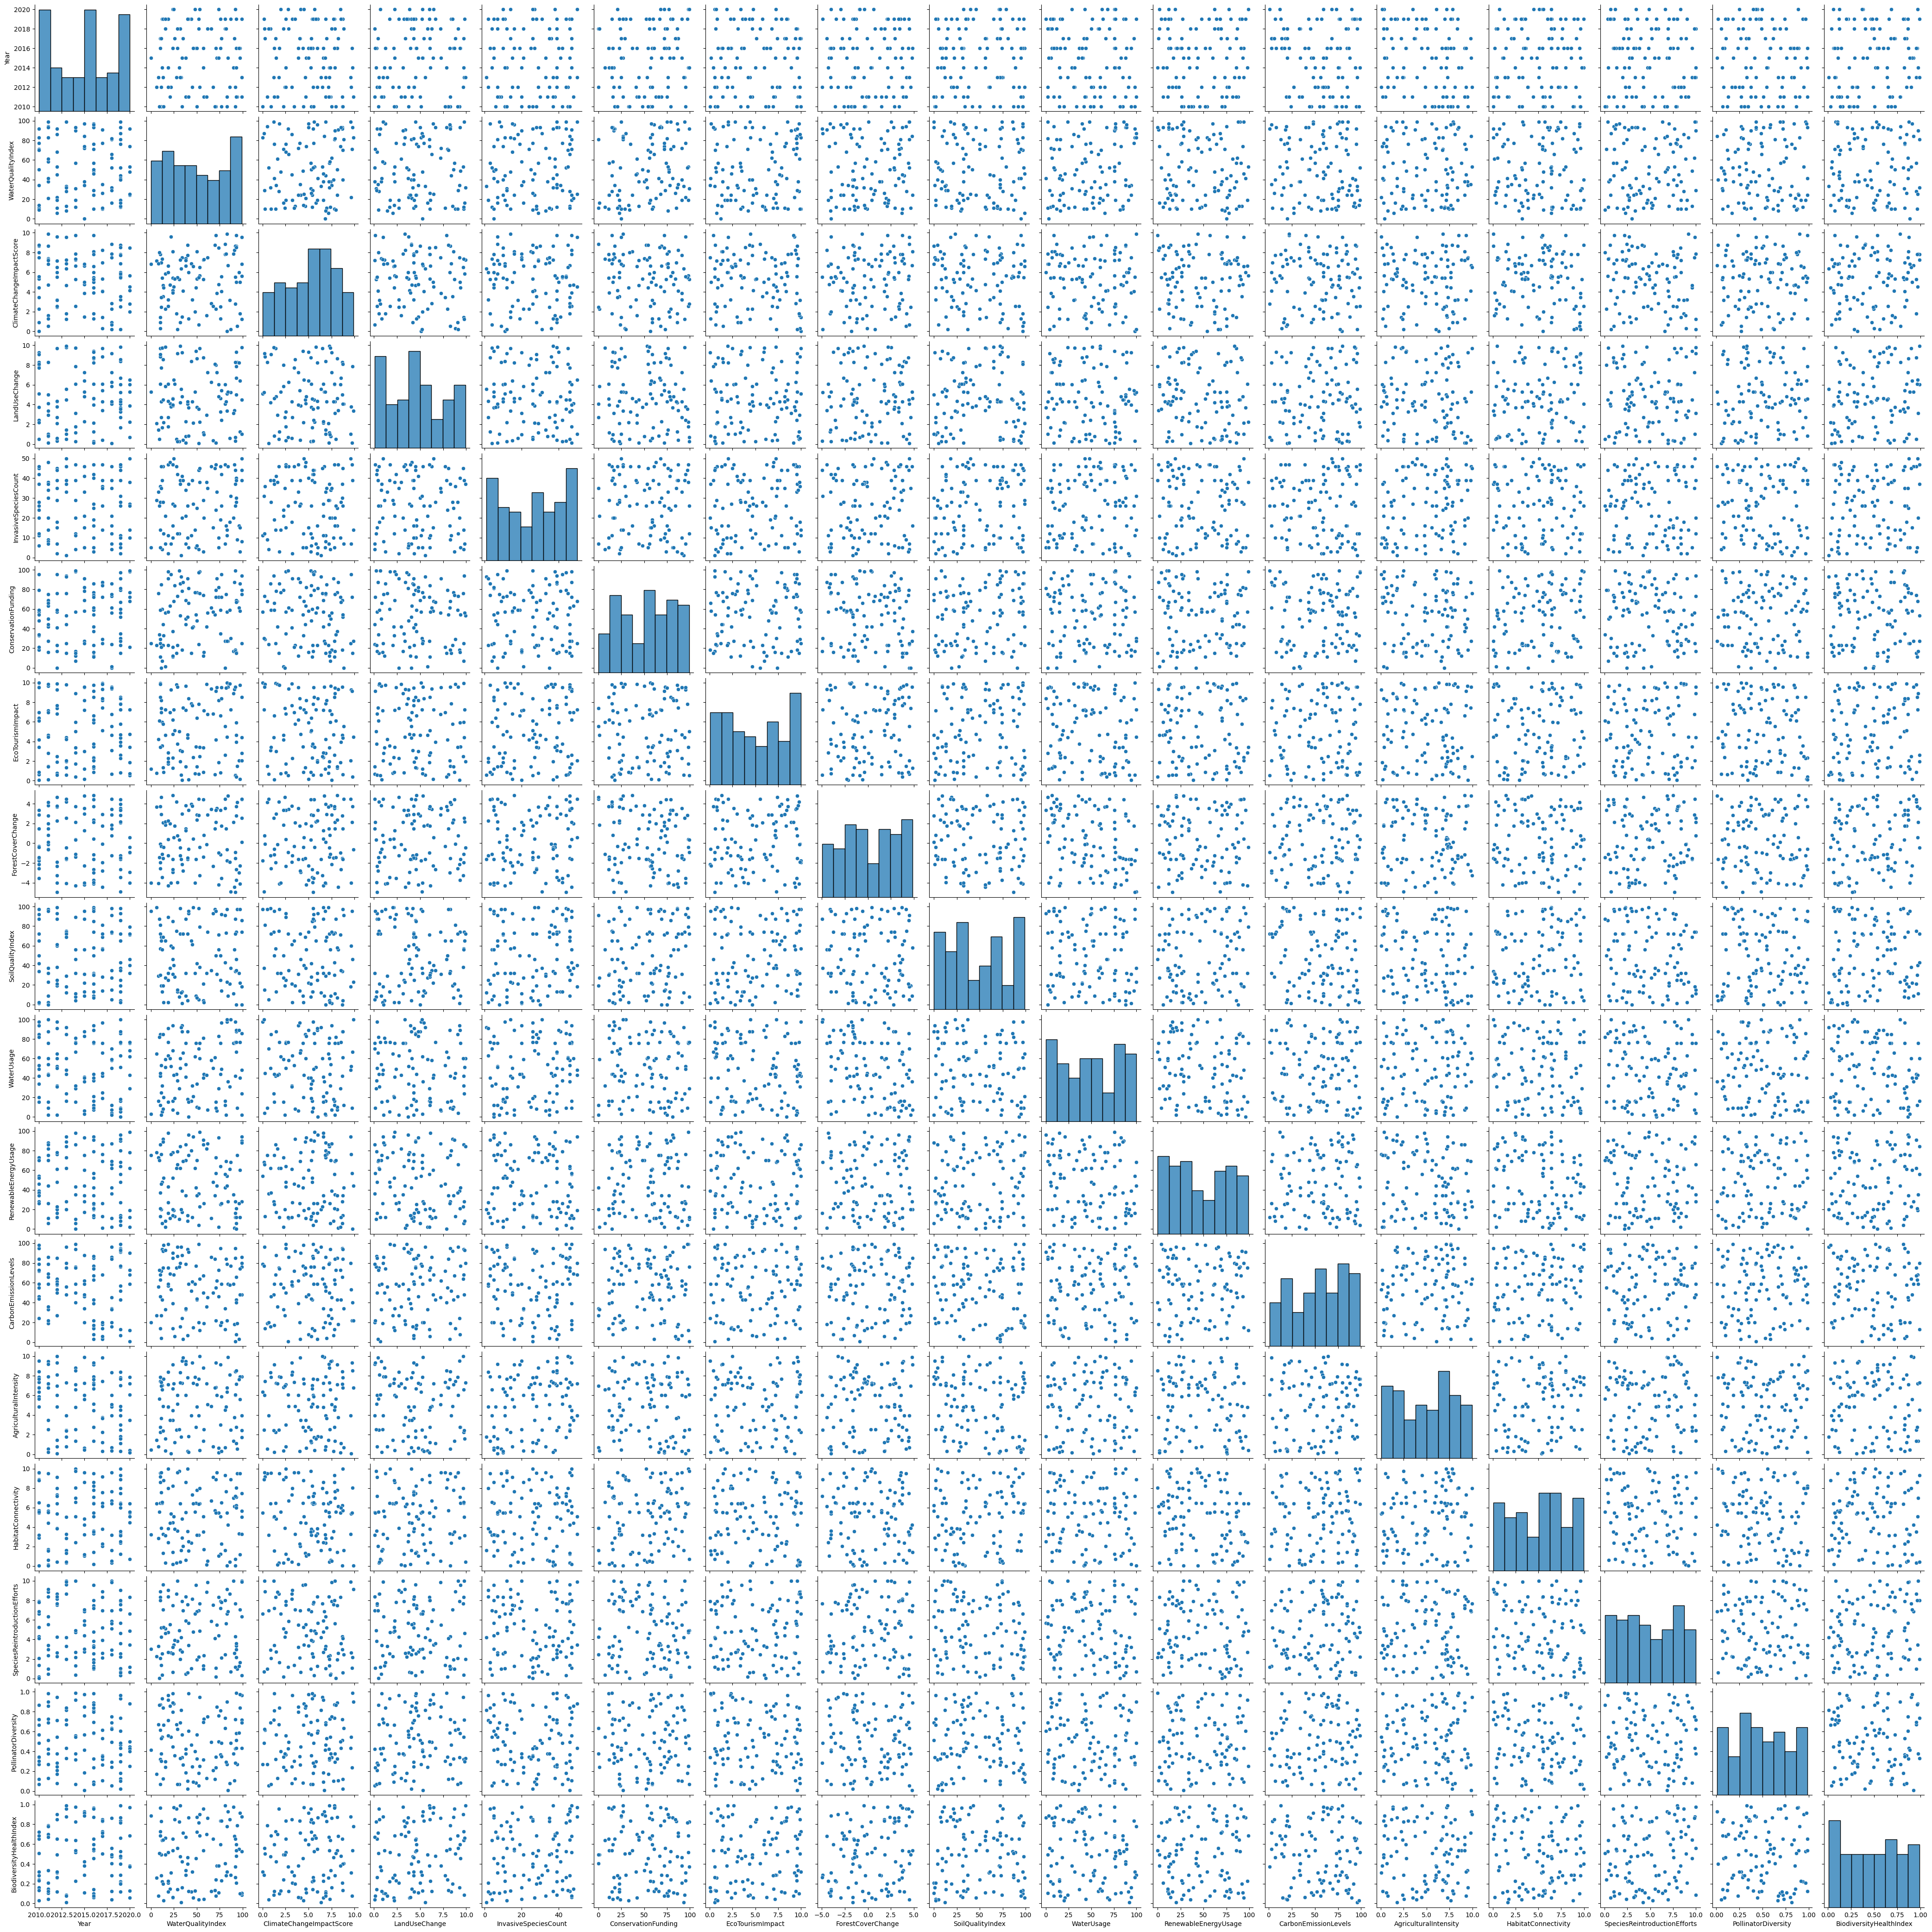

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics for numerical features
print(data.describe())

# Visualising the distribution of the BiodiversityHealthIndex
plt.figure(figsize=(8, 6))
sns.displot(data['BiodiversityHealthIndex'])
plt.title('Distribution of BiodiversityHealthIndex')
plt.xlabel('BiodiversityHealthIndex')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualise the relationships between variables
sns.pairplot(data.sample(100))  # Adjust sample size as necessary
plt.show()

### Exercise 2: Correlation analysis
Calculate the correlation coefficients between `BiodiversityHealthIndex` and each of the other environmental indicators. This will help us identify the variables most closely related to our target variable.

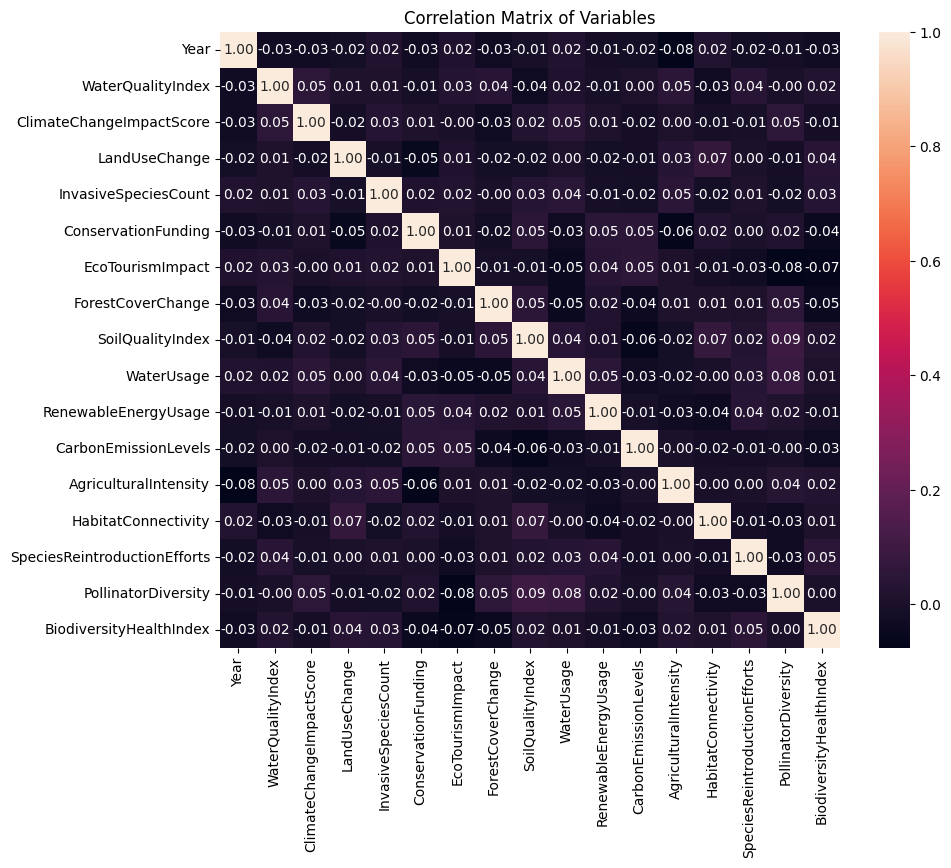

BiodiversityHealthIndex         1.000000
SpeciesReintroductionEfforts    0.047989
LandUseChange                   0.040171
InvasiveSpeciesCount            0.031199
SoilQualityIndex                0.023898
AgriculturalIntensity           0.023563
WaterQualityIndex               0.023446
HabitatConnectivity             0.008568
WaterUsage                      0.007323
PollinatorDiversity             0.002505
RenewableEnergyUsage           -0.010840
ClimateChangeImpactScore       -0.014917
Year                           -0.026502
CarbonEmissionLevels           -0.034371
ConservationFunding            -0.042731
ForestCoverChange              -0.046136
EcoTourismImpact               -0.066228
Name: BiodiversityHealthIndex, dtype: float64


In [9]:
# Correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Focus on correlations with BiodiversityHealthIndex
bhi_corr = corr_matrix['BiodiversityHealthIndex'].sort_values(ascending=False)
print(bhi_corr)

### Exercise 3: Selecting top variables and adjusting the dataset
Based on the correlation analysis, select the top six variables (`top_variables`) that show the highest correlation with `BiodiversityHealthIndex`. Adjust our dataset to include only the selected six variables and `BiodiversityHealthIndex`. This refined dataset will be used for training and testing our ensemble models.

In [10]:
# Variable names from our correlation analysis output above
top_variables = ['SpeciesReintroductionEfforts', 'LandUseChange', 'ForestCoverChange', 'EcoTourismImpact', 'ConservationFunding', 'CarbonEmissionLevels']

# Adjusting the dataset
X = data[top_variables]
y = data['BiodiversityHealthIndex']

# Display the first few rows of the adjusted dataset
print(X.head())

   SpeciesReintroductionEfforts  LandUseChange  ForestCoverChange  \
0                      9.311312       6.630073           0.032204   
1                      4.698086       6.477132          -4.803485   
2                      2.080495       9.069428          -2.563852   
3                      2.192657       7.061932           3.425382   
4                      7.405189       4.504786          -1.295086   

   EcoTourismImpact  ConservationFunding  CarbonEmissionLevels  
0          1.193810                   46                    22  
1          8.484718                   18                    63  
2          3.412444                   59                    46  
3          9.718453                   88                    60  
4          9.118186                   88                    61  


### Exercise 4: `RandomForestRegressor`

Implement a `RandomForestRegressor` from `sklearn.ensemble` to predict `BiodiversityHealthIndex` based on other environmental indicators. Split the data into training and test sets, fit the `RandomForestRegressor` model on the training data, and calculate the R-squared value on the test set.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print(f"R-squared of the RandomForestRegressor: {r_squared}")

R-squared of the RandomForestRegressor: -0.15686684733226142


### Exercise 5: `GradientBoostingRegressor`

Introduce `GradientBoostingRegressor` to predict `BiodiversityHealthIndex` using the same dataset. Train the model on the same training data and evaluate its R-squared value on the test set. Compare its performance with the `RandomForestRegressor`.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialise the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Fit the model
gb_regressor.fit(X_train, y_train)

# Predict on the test set with GradientBoostingRegressor
y_pred_gb = gb_regressor.predict(X_test)

# Calculate R-squared for GradientBoostingRegressor
r_squared_gb = r2_score(y_test, y_pred_gb)
print(f"R-squared of the GradientBoostingRegressor: {r_squared_gb}")

# Compare with RandomForestRegressor R-squared
print(f"R-squared of the RandomForestRegressor: {r_squared}")

R-squared of the GradientBoostingRegressor: -0.16498814928726668
R-squared of the RandomForestRegressor: -0.15686684733226142


#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>